In [144]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
# import scikit-learn Iris dataset
from sklearn.datasets import load_iris

# Load the Iris dataset into a Pandas DataFrame
iris_data = load_iris(as_frame=True)

# describe the dataset
iris_data["frame"].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [146]:
# create test set
from sklearn.model_selection import train_test_split

# Create features and target
x = iris_data["data"]
y = iris_data["target"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

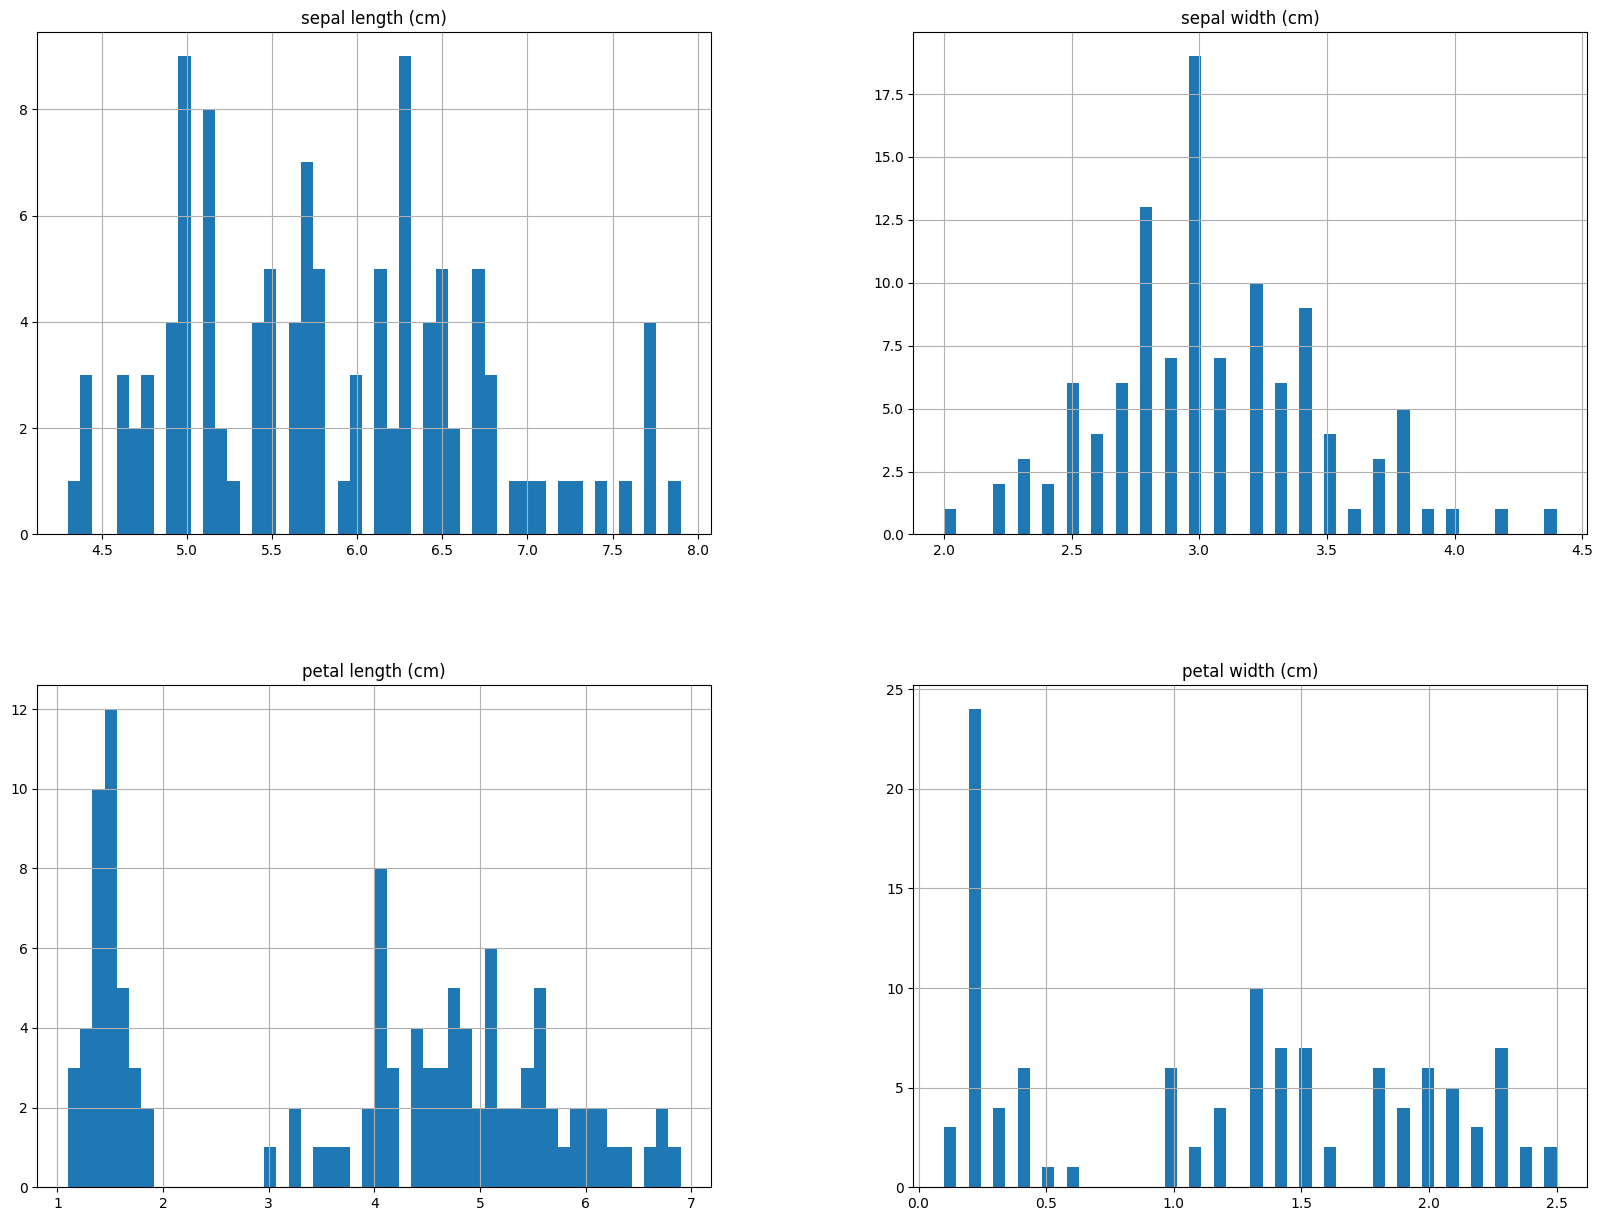

In [147]:
x_train.hist(bins=50, figsize=(20, 15))

In [148]:
# begin pipleine process
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Create a pipeline
pipeline = Pipeline(
    [
        ("scaler", scaler),
    ]
)

pipeline

Pipeline(steps=[('scaler', StandardScaler())])

In [180]:
# try linear regression
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model instance
lr_model = LinearRegression()

# create the pipeline
lr_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("lr", lr_model),
    ]
)

# Fit the model to the data
lr_pipeline.fit(x_train, y_train)

# Make predictions using the testing data
lr_pred = lr_pipeline.predict(x_test)

In [149]:
# try linear svc
from sklearn.svm import SVC

# Create the SVC model instance
svc_model = SVC(kernel="linear")

# create new pipleline
svc_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("svc", svc_model),
    ]
)

# Fit the model
svc_pipeline.fit(x_train, y_train)

# Make predictions using the testing data
svc_pred = svc_pipeline.predict(x_test)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [150]:
# now using Kneighbors
from sklearn.neighbors import KNeighborsClassifier

# Create the KN model instance
kn_model = KNeighborsClassifier(n_neighbors=3)

# create new pipleline
kn_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("kneighbors", kn_model),
    ]
)

# Fit the model
kn_pipeline.fit(x_train, y_train)

# Make predictions using the testing data
kn_pred = kn_pipeline.predict(x_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kneighbors', KNeighborsClassifier(n_neighbors=3))])

In [151]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create the RF model instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=7)

# create new pipleline
rf_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("randomforest", rf_model),
    ]
)

# Fit the model
rf_pipeline.fit(x_train, y_train)

# Make predictions using the testing data
rf_pred = rf_pipeline.predict(x_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest',
                 RandomForestClassifier(n_estimators=500, random_state=7))])

In [177]:
# cross validate test
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


# Create a list of the pipelines
pipelines = [lr_pipeline, svc_pipeline, kn_pipeline, rf_pipeline]

# Create empty list to hold scores
cv_scores = []

# run cross validation
lr_rmses = -cross_val_score(
    lr_pipeline, x_train, y_train, cv=3, scoring="neg_root_mean_squared_error"
)
svc_rmses = -cross_val_score(
    svc_pipeline, x_train, y_train, cv=3, scoring="neg_root_mean_squared_error"
)
kn_rmses = -cross_val_score(
    kn_pipeline, x_train, y_train, cv=3, scoring="neg_root_mean_squared_error"
)
rf_rmses = -cross_val_score(
    rf_pipeline, x_train, y_train, cv=3, scoring="neg_root_mean_squared_error"
)

In [179]:
print(lr_rmses)
print(svc_rmses)
print(kn_rmses)
print(rf_rmses)

[0.19469308 0.17349951 0.22397439]
[0.         0.16439899 0.16439899]
[0.28097574 0.16439899 0.2847474 ]
[0.16222142 0.16439899 0.16439899]


In [154]:
# import gridsearchCV
from sklearn.model_selection import GridSearchCV

# create instance


# Create the GridSearchCV model instance
svc_grid = GridSearchCV(
    svc_pipeline,
    param_grid={
        "svc__C": [1, 5, 10],
        "svc__gamma": [0.0001, 0.001, 0.01],
        "svc__kernel": ["linear", "rbf"],
    },
    n_jobs=-1,
)

kn_grid = GridSearchCV(
    kn_pipeline,
    param_grid={
        "kneighbors__n_neighbors": [3, 5, 11, 19],
        "kneighbors__weights": ["uniform", "distance"],
        "kneighbors__metric": ["euclidean", "manhattan"],
    },
    n_jobs=-1,
)

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid={
        "randomforest__n_estimators": [100, 500, 1000],
        "randomforest__max_depth": [3, 5, 11, 19],
        "randomforest__min_samples_split": [2, 5, 10],
    },
    n_jobs=-1,
)

In [155]:
# Fit the model
svc_grid.fit(x_train, y_train)
kn_grid.fit(x_train, y_train)
rf_grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomforest',
                                        RandomForestClassifier(n_estimators=500,
                                                               random_state=7))]),
             n_jobs=-1,
             param_grid={'randomforest__max_depth': [3, 5, 11, 19],
                         'randomforest__min_samples_split': [2, 5, 10],
                         'randomforest__n_estimators': [100, 500, 1000]})

In [156]:
# convert to dataframe
svc_results = pd.DataFrame(svc_grid.cv_results_)
kn_results = pd.DataFrame(kn_grid.cv_results_)
rf_results = pd.DataFrame(rf_grid.cv_results_)

In [157]:
# Make predictions with the tuned model
svc_grid_pred = svc_grid.predict(x_test)
kn_grid_pred = kn_grid.predict(x_test)
rf_grid_pred = rf_grid.predict(x_test)

# Print the classification report
from sklearn.metrics import classification_report

print("SVC Classification Report")
print(classification_report(y_test, svc_grid_pred))
print("KN Classification Report")
print(classification_report(y_test, kn_grid_pred))
print("RF Classification Report")
print(classification_report(y_test, rf_grid_pred))

SVC Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.86      0.86        14
           2       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38

KN Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      0.86      0.83        14
           2       0.83      0.77      0.80        13

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38

RF Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.76      0.93      0.84        14

In [158]:
# import kmeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters
kmeans_model = KMeans(n_clusters=3)

# create new pipleline
kmeans_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("kmeans", kmeans_model),
    ]
)

# Fit the model
kmeans_pipeline.fit(x_train, y_train)

# Make predictions with the tuned model
kmeans_pred = kmeans_pipeline.predict(x_test)

# Print the classification report
print("KMeans Classification Report")
print(classification_report(y_test, kmeans_pred))

KMeans Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.60      0.64      0.62        14
           2       0.00      0.00      0.00        13

    accuracy                           0.24        38
   macro avg       0.20      0.21      0.21        38
weighted avg       0.22      0.24      0.23        38



/Users/parsarezaei/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [159]:
# try using KNearest Neighbors
from sklearn.neighbors import KNeighborsClassifier


# Create the KN model instance
kn_model = KNeighborsClassifier(n_neighbors=3)

# create new pipleline
kn_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("kneighbors", kn_model),
    ]
)

# Fit the model
kn_pipeline.fit(x_train, y_train)

# Make predictions with the tuned model
kn_pred = kn_pipeline.predict(x_test)

# Print the classification report
print("KN Classification Report")
print(classification_report(y_test, kn_pred))

KN Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.76      0.93      0.84        14
           2       0.91      0.77      0.83        13

    accuracy                           0.87        38
   macro avg       0.89      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



In [160]:
# knn gridsearchcv
# Create the GridSearchCV model instance
kn_grid = GridSearchCV(
    kn_pipeline,
    param_grid={
        "kneighbors__n_neighbors": [3, 5, 11, 19],
        "kneighbors__weights": ["uniform", "distance"],
        "kneighbors__metric": ["euclidean", "manhattan"],
    },
    n_jobs=-1,
)

# Fit the model
kn_grid.fit(x_train, y_train)

# convert to dataframe
kn_results = pd.DataFrame(kn_grid.cv_results_)

# Make predictions with the tuned model
kn_grid_pred = kn_grid.predict(x_test)

# Print the classification report
print("KN Classification Report")
print(classification_report(y_test, kn_pred))

KN Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      0.86      0.83        14
           2       0.83      0.77      0.80        13

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38



In [161]:
print(kn_grid.best_params_)

{'kneighbors__metric': 'manhattan', 'kneighbors__n_neighbors': 3, 'kneighbors__weights': 'uniform'}


In [162]:
# lets try naive bayes
from sklearn.naive_bayes import GaussianNB

# Create the NB model instance
nb_model = GaussianNB()

# create new pipleline
nb_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("naivebayes", nb_model),
    ]
)

# Fit the model
nb_pipeline.fit(x_train, y_train)

# Make predictions with the tuned model
nb_pred = nb_pipeline.predict(x_test)

# Print the classification report
print("NB Classification Report")
print(classification_report(y_test, nb_pred))

NB Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.79      0.81        14
           2       0.79      0.85      0.81        13

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38



In [163]:
# NB grid search cv
# Create the GridSearchCV model instance
nb_grid = GridSearchCV(
    nb_pipeline,
    param_grid={"naivebayes__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]},
    n_jobs=-1,
)

# Fit the model
nb_grid.fit(x_train, y_train)

# convert to dataframe
nb_results = pd.DataFrame(nb_grid.cv_results_)

# Make predictions with the tuned model
nb_grid_pred = nb_grid.predict(x_test)

# Print the classification report
print("NB Classification Report")
print(classification_report(y_test, nb_grid_pred))

NB Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.79      0.81        14
           2       0.79      0.85      0.81        13

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38



In [164]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the LDA model instance
lda_model = LinearDiscriminantAnalysis()

# create new pipleline
lda_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("lda", lda_model),
    ]
)

# Fit the model
lda_pipeline.fit(x_train, y_train)

# Make predictions with the tuned model
lda_pred = lda_pipeline.predict(x_test)

# Print the classification report
print("LDA Classification Report")
print(classification_report(y_test, lda_pred))

LDA Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [165]:
# neural networks
from sklearn.neural_network import MLPClassifier

# Create the NN model instance
nn_model = MLPClassifier(random_state=7)

# create new pipleline
nn_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("neuralnetwork", nn_model),
    ]
)

# Fit the model
nn_pipeline.fit(x_train, y_train)

# Make predictions with the tuned model
nn_pred = nn_pipeline.predict(x_test)

# Print the classification report
print("NN Classification Report")
print(classification_report(y_test, nn_pred))

NN Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.80      0.86      0.83        14
           2       0.85      0.85      0.85        13

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.88        38
weighted avg       0.87      0.87      0.87        38



/Users/parsarezaei/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [166]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier

# Create the GBM model instance
gbm_model = GradientBoostingClassifier(random_state=7)

# create new pipleline
gbm_pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("gradientboosting", gbm_model),
    ]
)

# Fit the model
gbm_pipeline.fit(x_train, y_train)

# Make predictions with the tuned model
gbm_pred = gbm_pipeline.predict(x_test)

# Print the classification report
print("GBM Classification Report")
print(classification_report(y_test, gbm_pred))

GBM Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.76      0.93      0.84        14
           2       0.90      0.69      0.78        13

    accuracy                           0.87        38
   macro avg       0.89      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



In [167]:
# grid search cv LDA

# Create the GridSearchCV model instance
lda_grid = GridSearchCV(
    lda_pipeline, param_grid={"lda__solver": ["svd", "lsqr", "eigen"]}, n_jobs=-1
)

# Fit the model
lda_grid.fit(x_train, y_train)

# convert to dataframe
lda_grid_results = pd.DataFrame(lda_grid.cv_results_)

# Make predictions with the tuned model
lda_grid_pred = lda_grid.predict(x_test)

# Print the classification report
print("LDA Classification Report")
print(classification_report(y_test, lda_grid_pred))
print(classification_report(y_test, lda_pred))

print(lda_grid.best_params_)

LDA Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

{'lda__solver': 'svd'}


In [168]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix

# Create confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
svc_grid_cm = confusion_matrix(y_test, svc_grid_pred)
kn_cm = confusion_matrix(y_test, kn_pred)
kn_grid_cm = confusion_matrix(y_test, kn_grid_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_grid_cm = confusion_matrix(y_test, rf_grid_pred)
kmeans_cm = confusion_matrix(y_test, kmeans_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
nb_grid_cm = confusion_matrix(y_test, nb_grid_pred)
lda_cm = confusion_matrix(y_test, lda_pred)
lda_grid_cm = confusion_matrix(y_test, lda_grid_pred)
nn_cm = confusion_matrix(y_test, nn_pred)
gbm_cm = confusion_matrix(y_test, gbm_pred)

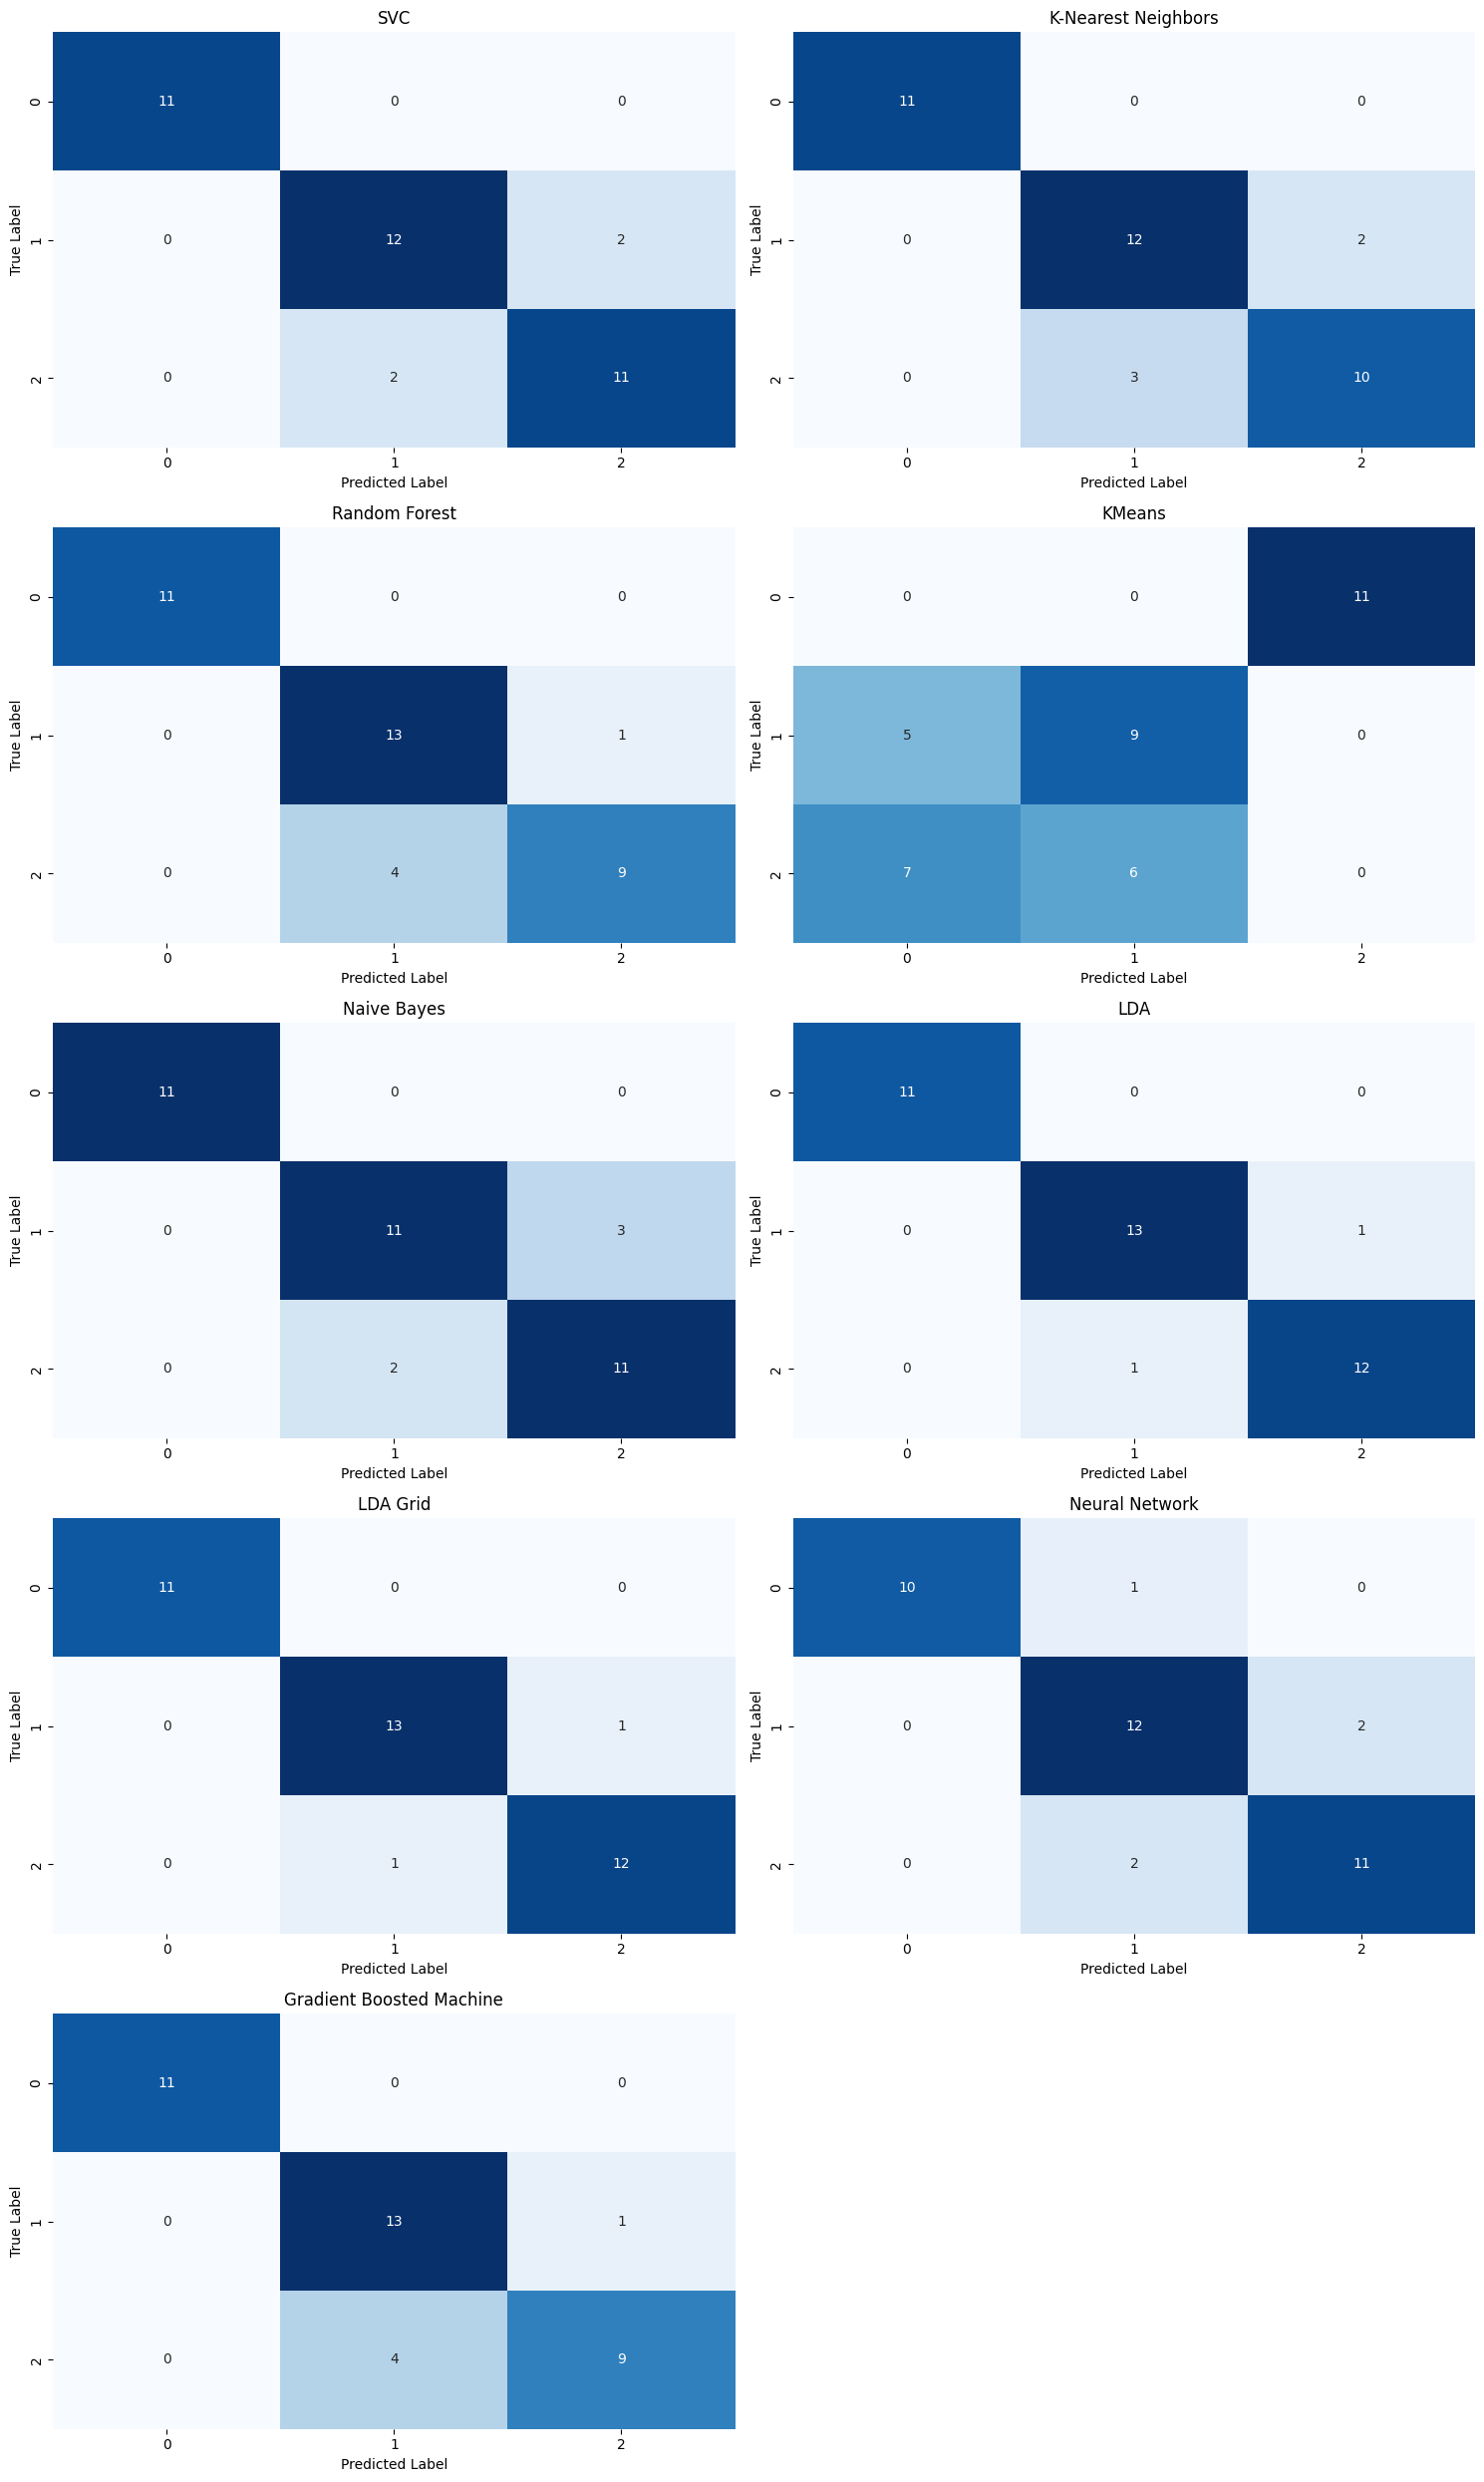

In [170]:
import seaborn as sns

# List of confusion matrices and corresponding labels
cms = [
    (svc_cm, "SVC"),
    (kn_cm, "K-Nearest Neighbors"),
    (rf_cm, "Random Forest"),
    (kmeans_cm, "KMeans"),
    (nb_cm, "Naive Bayes"),
    (lda_cm, "LDA"),
    (lda_grid_cm, "LDA Grid"),
    (nn_cm, "Neural Network"),
    (gbm_cm, "Gradient Boosted Machine"),
]

plt.figure(figsize=(15, 25))

# Loop through the confusion matrices and plot each
for idx, (cm, label) in enumerate(cms, 1):
    plt.subplot(5, 2, idx)  # Adjust this grid based on the number of plots
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", cbar=False)
    plt.title(label)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

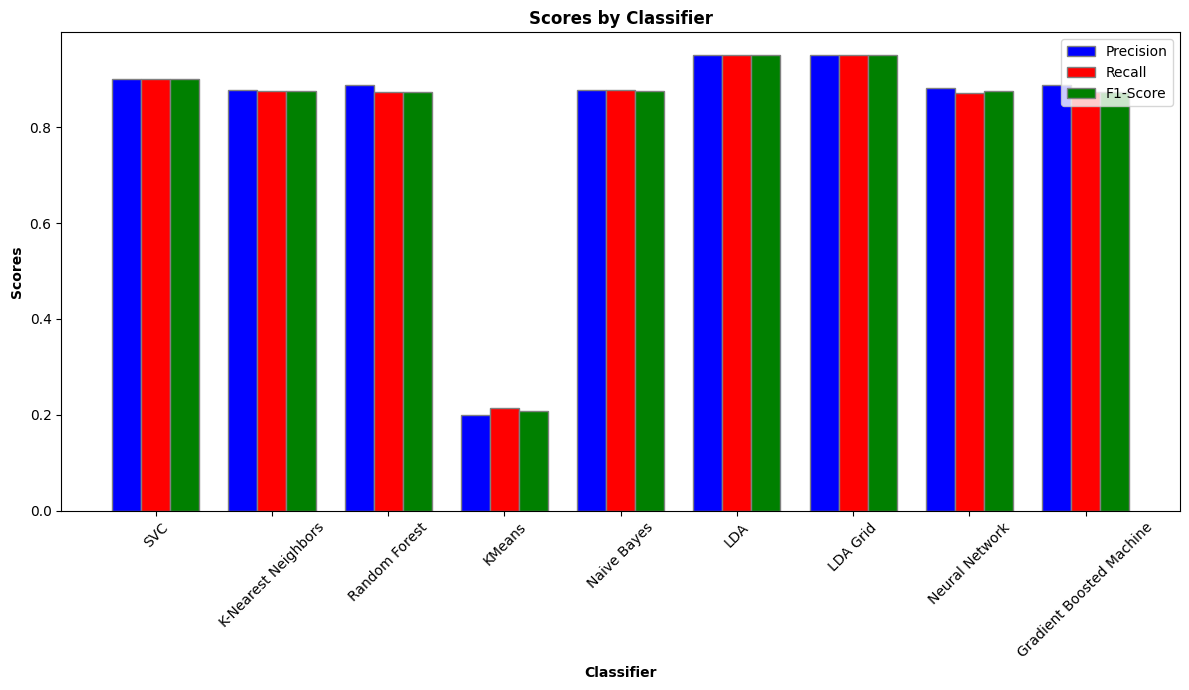

In [183]:
# List of predictions and their labels
preds = [
    (svc_pred, "SVC"),
    (kn_pred, "K-Nearest Neighbors"),
    (rf_pred, "Random Forest"),
    (kmeans_pred, "KMeans"),
    (nb_pred, "Naive Bayes"),
    (lda_pred, "LDA"),
    (lda_grid_pred, "LDA Grid"),
    (nn_pred, "Neural Network"),
    (gbm_pred, "Gradient Boosted Machine"),
]

# Extract precision, recall, and f1-score from classification reports
labels = []
precision_vals = []
recall_vals = []
f1_vals = []

for pred, label in preds:
    report = classification_report(y_test, pred, output_dict=True)
    avg_results = report[
        "macro avg"
    ]  # This will consider the macro average, change if needed

    labels.append(label)
    precision_vals.append(avg_results["precision"])
    recall_vals.append(avg_results["recall"])
    f1_vals.append(avg_results["f1-score"])

# Bar chart plotting
barWidth = 0.25
r1 = range(len(precision_vals))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 7))

# Create bars
plt.bar(
    r1,
    precision_vals,
    width=barWidth,
    color="blue",
    edgecolor="grey",
    label="Precision",
)
plt.bar(r2, recall_vals, width=barWidth, color="red", edgecolor="grey", label="Recall")
plt.bar(r3, f1_vals, width=barWidth, color="green", edgecolor="grey", label="F1-Score")

# Title & Subtitle
plt.title("Scores by Classifier", fontweight="bold")
plt.xlabel("Classifier", fontweight="bold")
plt.ylabel("Scores", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(precision_vals))], labels, rotation=45)

# Show the legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()